# Simple harmonic oscillator simulation classes

Classes for simulating the motion of a mass on a spring

## Define the simulation class for a Hamonic Oscillator and a function to call it

In [1]:
import matplotlib.pyplot as plt
import numpy as np

class SimpleHarmonicOscillator:
    # Set initial conditions and constants during object construction
    def __init__(self, x, v, k):
        self.x = x
        self.v = v
        self.k = k

    # Function to move the simulation forward in time 1 step (step size is an input)
    def step( self, dt = 0.001 ):
        # Resolve forces
        F = -self.k*self.x
        # Update velocty based on force
        self.v = self.v + dt*F
        # Update position based on velocity
        self.x = self.x + dt * self.v
        # Return the new X position for plotting with
        return self.x

def PlotSimpleHarmonicOscillator(x , v , k , n ):
    # Construct the simulation and assign it to the variable 'a'
    a = SimpleHarmonicOscillator(x, v , k )
    # Time step size
    dt = 0.001
    # Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
    X = np.zeros((n,))
    T = np.zeros((n,))
    # Run the simulation for n steps
    for i in range(n):
        X[i] = a.step(dt)
        T[i] = i*dt
    # Plot Time vs X position and add label for legend
    plt.plot(T,X, label = 'k={0:.1f}'.format(k))

### Experiment with the spring constant in a simple harmonic oscillator

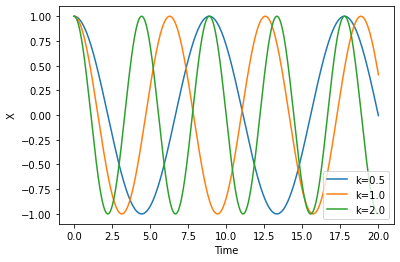

In [2]:
PlotSimpleHarmonicOscillator(x = 1., v = 0., k = 0.5, n = 20000)
PlotSimpleHarmonicOscillator(x = 1., v = 0., k = 1., n = 20000)
PlotSimpleHarmonicOscillator(x = 1., v = 0., k = 2., n = 20000)

plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

## Define the simulation class for a Damped Hamonic Oscillator and a function to call it

In [3]:
class DampedHarmonicOscillator:
    # Set initial conditions and constants during object construction
    def __init__(self, x, v, k,gamma):
        self.x = x
        self.v = v
        self.k = k
        self.gamma = gamma

    # Function to move the simulation forward in time 1 step (step size is an input)
    def step( self, dt = 0.001 ):
        # Resolve forces
        F = -self.k*self.x - self.gamma*self.v
        # Update velocty based on force
        self.v = self.v + dt*F
        # Update position based on velocity
        self.x = self.x + dt * self.v
        # Return the new X position for plotting with
        return self.x

def PlotDampedHarmonicOscillator(x , v , k , gamma, n ):
    # Construct the simulation and assign it to the variable 'a'
    a = DampedHarmonicOscillator(x, v , k , gamma )
    # Time step size
    dt = 0.001
    # Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
    X = np.zeros((n,))
    T = np.zeros((n,))
    # Run the simulation for n steps
    for i in range(n):
        X[i] = a.step(dt)
        T[i] = i*dt
    # Plot Time vs X position and add label for legend
    plt.plot(T,X, label = 'k={0:.1f} \u0263={1:.1f}'.format(k,gamma))

### Experiment with the damping factor in a damped harmonic oscilator

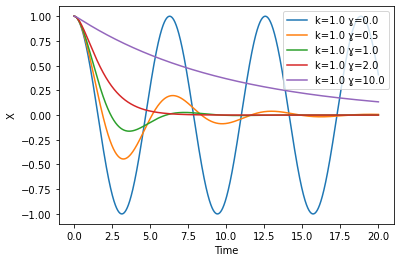

In [4]:
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0, n = 20000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, n = 20000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 1, n = 20000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 2, n = 20000)
PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 10, n = 20000)
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

#### Repeat the same work, but use a for loop instead of repeating ourselves

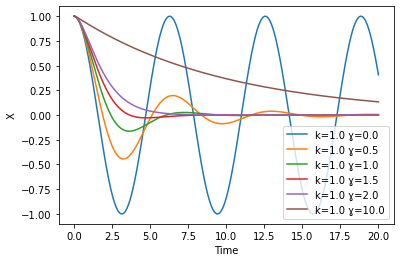

In [5]:
for g in [ 0., 0.5, 1., 1.5, 2, 10 ]:
    PlotDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = g, n = 20000)
plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()


## Define the simulation class for a Forced, Damped, Hamonic Oscillator and a function to call it

In [6]:
class ForcedDampedHarmonicOscillator:
    def __init__(self, x, v, k,gamma,F_0, omega):
        # Set initial conditions and constants during object construction
        self.x = x
        self.v = v
        self.k = k
        self.gamma = gamma
        self.F_0 = F_0
        self.omega = omega

    # Function to move the simulation forward in time 1 step (step size is an input)
    def step( self, dt = 0.001 , t = 0):
        # Resolve forces
        F = -self.k*self.x - self.gamma*self.v + self.F_0 * np.cos ( self.omega * t )
        # Update velocty based on force
        self.v = self.v + dt*F
        # Update position based on velocity
        self.x = self.x + dt * self.v
        # Return the new X position for plotting with
        return self.x


def PlotForcedDampedHarmonicOscillator(x , v , k , gamma, F_0 , omega , n ):
    # Construct the simulation and assign it to the variable 'a'
    a = ForcedDampedHarmonicOscillator(x, v , k , gamma, F_0 , omega )
    # Time step size
    dt = 0.001
    # Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
    X = np.zeros((n,))
    T = np.zeros((n,))
    # Run the simulation for n steps
    for i in range(n):
        X[i] = a.step(dt, i*dt)
        T[i] = i*dt
    # Plot Time vs X position and add label for legend
    plt.plot(T,X, label = 'k={0:.1f} \u0263={1:.1f} F_0={2:.1f} \u03C9={3:.1f}'.format(k,gamma,F_0,omega))

### Experiment with the damping factor of a forced, damped, harmonic oscillator

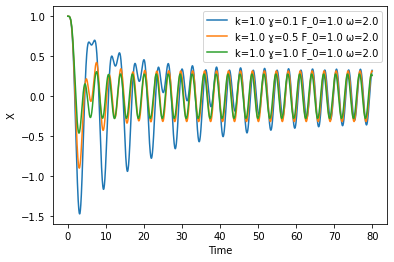

In [7]:

PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.1, F_0 = 1, omega = 2,n = 80000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 2,n = 80000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 1, F_0 = 1, omega = 2,n = 80000)

plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

### Experiment with the driving frequency of a forced, damped harmonic oscillaltor

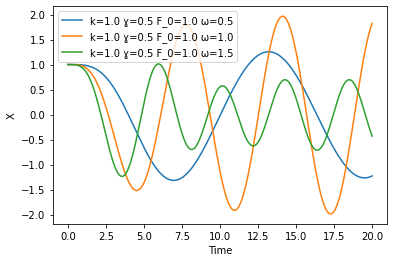

In [8]:

PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 0.5,n = 20000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 1,n = 20000)
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.5, F_0 = 1, omega = 1.5,n = 20000)

plt.xlabel('Time')
plt.ylabel('X')
plt.legend()
plt.show()

### Plot data

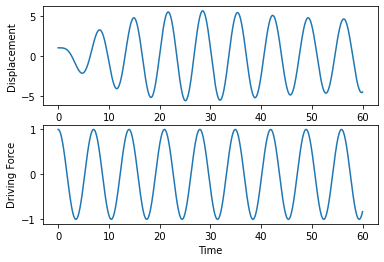

In [9]:
DrivingForce = 1
DrivingFrequency = 0.9
SimulationSteps = 60000
plt.subplot(211)
plt.xlabel('Time')
plt.ylabel('Displacement')
PlotForcedDampedHarmonicOscillator(x = 1., v = 0., k = 1., gamma = 0.1, F_0 = DrivingForce , omega = DrivingFrequency,n = SimulationSteps)

plt.subplot(212)
# Plot 
# Time step size
dt = 0.001
# Assign memory for the number of steps we will take (pre-assigned memory is faster than appending later)
X = np.zeros((SimulationSteps,))
T = np.zeros((SimulationSteps,))
# Run the simulation for n steps
for i in range(SimulationSteps):
    X[i] = DrivingForce * np.cos ( DrivingFrequency * i * dt )
    T[i] = i*dt
# Plot Driving force
plt.plot(T,X, label = 'Driving force F_0={0:.1f} \u03C9={1:.1f}'.format(DrivingForce,DrivingFrequency))
plt.xlabel('Time')
plt.ylabel('Driving Force')
#plt.legend()
plt.show()

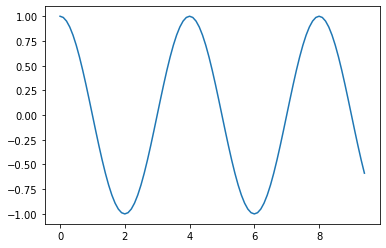